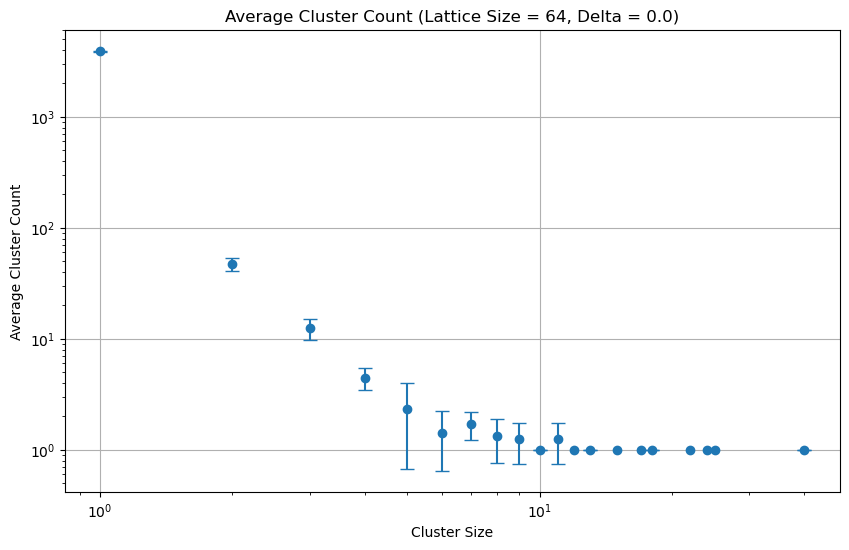

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from os.path import join

fixedLatticeSize = 64
fixedDelta = 0.00

# Directory containing your CSV files
directory = 'csvfiles'

# Read the metadata file
metadata = pd.read_csv(join(directory, 'metadata.csv'), header=None)
metadata.columns = ['Seed', 'GraphType', 'LatticeSize', 'Delta', 'Temperature', 'Trials', 'Partition', 'Subsystems', 'Identifier']

# Filter metadata for runs with lattice size 10 and delta 0
filtered_metadata = metadata[(metadata['LatticeSize'] == fixedLatticeSize) & (metadata['Delta'] == fixedDelta)]

# Initialize a DataFrame to aggregate cluster data
aggregate_data = pd.DataFrame()

# Process each filtered simulation run
for index, row in filtered_metadata.iterrows():
    file_identifier = row['Identifier']
    filename = f"{file_identifier}_cluster_statistics.csv"
    
    # Read the cluster data file
    cluster_data = pd.read_csv(join(directory, filename))

    # Strip whitespace from column names
    cluster_data.columns = cluster_data.columns.str.strip()

    # Aggregate the data
    aggregate_data = pd.concat([aggregate_data, cluster_data], axis=0)

# Group by cluster size and calculate the average and standard deviation
stats = aggregate_data.groupby('Cluster Size').agg(['mean', 'std'])
average_data = stats['Cluster Count']['mean'].reset_index()
std_dev_data = stats['Cluster Count']['std'].reset_index()

# Plotting with error bars
plt.figure(figsize=(10, 6))
plt.errorbar(average_data['Cluster Size'], average_data['mean'], yerr=std_dev_data['std'], fmt='o', capsize=5)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Cluster Size')
plt.ylabel('Average Cluster Count')
plt.title(f'Average Cluster Count (Lattice Size = {fixedLatticeSize}, Delta = {fixedDelta})')

plt.grid(True)
plt.show()
